## Exploring how yolo works with other datasets and ours

via: https://www.cvlib.net/

requirements: numpy, opencv, requests, progressbar, pillow, tensorflow, keras, cvlib
notes: need to have latest numpy update, install cvlib after the dependencies

conda install 
pip install imageio-ffmpeg

In [13]:
# required for yolov3
import numpy as np
import cvlib as cv
from cvlib.object_detection import draw_bbox
import imageio
imageio.plugins.ffmpeg.download()

# required for extracting images from video
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

First try on an image

In [14]:
# upload video and read with cv2
vidcap = cv2.VideoCapture('C:/Users/joh3146/Desktop/video001.mp4')
success, image = vidcap.read()

print(image.shape, type(image))

(288, 352, 3) <class 'numpy.ndarray'>


In [15]:
# take first frame from video
cv2.imwrite("C:/Users/joh3146/Desktop/frame001.jpg", image)

True

this part can be really slow if the config file hasn't been downloaded, but seems like a one-off thing

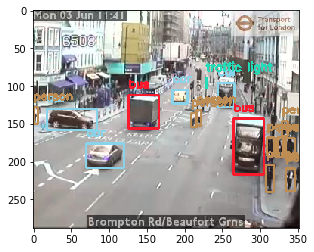

In [18]:
bbox, label, conf = cv.detect_common_objects(image)
output_image = draw_bbox(image, bbox, label, conf)
cv2.imwrite("C:/Users/joh3146/Desktop/frame001_detect.jpg", output_image)
plt.imshow(output_image)

now try with a video file

In [19]:
bbox_list = []
label_list = []
conf_list = []
out_list = []
# loop through frames of video
while vidcap.isOpened():
    status, frame = vidcap.read()
    
    if not status:
        break

    # apply object detection
    bbox, label, conf = cv.detect_common_objects(frame, confidence=0.25, model='yolov3-tiny')
    
    # draw bounding box over detected objects
    out = draw_bbox(frame, bbox, label, conf, write_conf=True)
    
    bbox_list.append(bbox)
    label_list.append(label)
    conf_list.append(conf)
    out_list.append(out)

Turn the outgoing list into a np array

In [25]:
out_npy = np.asarray(out_list)
float(int(len(out_list)/10))

242


24.0

In [21]:
print(type(out_npy.shape[2]))

<class 'int'>


convert to mp4 with imageio

In [22]:
imageio.mimwrite('C:/Users/joh3146/Desktop/video001_out.mp4', out_npy, fps = 24.0)

In [23]:
import io
import base64
from IPython.display import HTML

# view downloaded file embedded in jupyter notebook
video = io.open('C:/Users/joh3146/Desktop/video001_out.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

## junk code

In [ ]:
# initialize the video writer
fps = int(out_npy.shape[0]/10)
frame_width = out_npy.shape[1]
frame_height = out_npy.shape[2]

# fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

writer = cv2.VideoWriter('C:/Users/joh3146/Desktop/video001_out.avi',
                              -1, 
                              15.0, (frame_width, frame_height), True)

for tick in range(len(out_list)):
    writer.write(out_npy[tick])
    
print(type(writer))
writer.release()
# writer.write(out_npy)

In [ ]:
print(type(out_list[0][0, 0, 0].astype('uint8')))

In [ ]:
print(type(frame_width))
print(out_list[0].shape)
print(frame_width, frame_height)